# Processing Shapefile's into GeoJSON data

The goal of this notebook is to get a GeoJSON file that contains polygonal data for mapping the UK. Data was obtained from the [ONS](https://geoportal.statistics.gov.uk/datasets/local-administrative-units-level-1-january-2018-ultra-generalised-clipped-boundaries-in-united-kingdom?geometry=-54.972%2C52.104%2C56.781%2C60.585&selectedAttribute=bng_n)

In [1]:
import json

import pandas as pd 
import geopandas as gpd
import plotly
import plotly.express as px 

pd.options.mode.chained_assignment = None

# Processing LAUA Shapefile

In [2]:
laua_fpath = r'Local_Administrative_Units_Level_1__January_2018__Boundaries-shp\Local_Administrative_Units_Level_1__January_2018__Boundaries.shp'
dataset_fpath = r"Subnational_total_final_energy_consumption_statistics.csv"

gdf = gpd.read_file(laua_fpath)
df = pd.read_csv(dataset_fpath)

### Preprocessing the dataset 

Before matching our dataset to our shapefile data, we're just going to get rid of some rows we don't need 

In [3]:
df = df[~df["LAUA"].isin(["DUKES", "Unallocated"])]
df = df[df["UNIT"] == "GWh"]

In [4]:
gdf

objectid   lau118cd              lau118nm   bng_e   bng_n     long  \
0           1  E06000001            Hartlepool  447157  531476 -1.27023   
1           2  E06000002         Middlesbrough  451141  516887 -1.21099   
2           3  E06000003  Redcar and Cleveland  464359  519597 -1.00611   
3           4  E06000004      Stockton-on-Tees  444937  518183 -1.30669   
4           5  E06000005            Darlington  428029  515649 -1.56835   
..        ...        ...                   ...     ...     ...      ...   
395       396  W06000020               Torfaen  327459  200480 -3.05101   
396       397  W06000021         Monmouthshire  337812  209231 -2.90280   
397       398  W06000022               Newport  337897  187433 -2.89769   
398       399  W06000023                 Powys  302328  273254 -3.43533   
399       400  W06000024        Merthyr Tydfil  305916  206424 -3.36425   

           lat    st_areasha     st_lengths  \
0    54.676159  9.626308e+07   50941.998211   
1    54.544670  5.523098e+07   35500.308848   
2    54.567520  2.475390e+08   78163.814712   
3    54.556911  2.051922e+08   87661.002114   
4    54.535351  1.988128e+08   91926.842748   
..         ...           ...            ...   
395  51.698360  1.257167e+08   68469.967317   
396  51.778271  8.545377e+08  181587.902235   
397  51.582321  1.934646e+08   81996.305299   
398  52.348629  5.199755e+09  504309.889208   
399  51.748581  1.134292e+08   59195.326092   

                                              geometry  
0    POLYGON ((448906.504 536702.994, 448926.003 53...  
1    POLYGON ((451894.306 521145.310, 453997.697 51...  
2    POLYGON ((478368.200 518993.999, 477689.303 51...  
3    POLYGON ((452185.277 526288.454, 451708.002 52...  
4    POLYGON ((436388.002 522354.197, 437351.702 52...  
..                                                 ...  
395  POLYGON ((333723.000 192653.903, 331617.797 19...  
396  POLYGON ((355272.704 214366.797, 354547.699 21...  
397  POLYGON ((343091.792 184213.400, 339999.991 18...  
398  POLYGON ((322891.603 333139.299, 323688.497 33...  
399  POLYGON ((308057.304 211036.201, 308367.104 20...  

[400 rows x 10 columns]

In [5]:
df

LAUA                  NAME  Coal_Industrial  Coal_Commercial  \
1      E06000001            Hartlepool         0.012138         0.006589   
2      E06000002         Middlesbrough         0.000000         0.000000   
3      E06000003  Redcar and Cleveland      2199.934728         0.044696   
4      E06000004      Stockton-on-Tees        48.104522         0.025729   
5      E06000005            Darlington         0.559835         0.029317   
...          ...                   ...              ...              ...   
10928  W06000022               Newport         1.759601         0.045723   
10929  W06000023                 Powys        21.550236         0.623359   
10930  W06000024        Merthyr Tydfil         0.203490         0.035492   
10931  W92000004                 WALES      1643.214237         7.533099   
10932  W92000004                 Wales      1643.214237         7.533099   

       Coal_Domestic  Coal_Rail  Coal_Public  Coal_Agriculture   Total_COAL  \
1           2.151979   0.000000     0.016881          0.006931     2.194518   
2           2.484705   0.000000     0.000000          0.000000     2.484705   
3           7.535284   0.000000     0.529723          0.040675  2208.085106   
4           3.942552   0.000000     0.850506          0.016963    52.940272   
5           3.323750   0.000000     0.499435          0.046877     4.459214   
...              ...        ...          ...               ...          ...   
10928       9.293003   0.000000     0.255327          0.000000    11.353654   
10929      61.991460   2.701054     1.571809          0.000000    88.437919   
10930       8.424039   0.142161     0.293807          0.000000     9.098988   
10931     573.244445  21.842763    20.382635          0.000000  2266.217179   
10932     573.244445  21.842763    20.382635          0.000000  2266.217179   

       Manufactured_Industrial  ...  Electricity_Total  Bioenergy_Commercial  \
1                   270.446960  ...         549.319790              0.000000   
2                     2.495918  ...         797.818000              0.000000   
3                  6263.301108  ...        1263.692540            374.079009   
4                     4.654302  ...        1297.500950              0.000000   
5                     2.847366  ...         510.440700              0.000000   
...                        ...  ...                ...                   ...   
10928                40.580965  ...         815.948122              0.000000   
10929                 6.035437  ...         587.686885              0.000000   
10930                 0.000000  ...         207.451402              0.000000   
10931              7284.699625  ...       14761.220380           2841.157319   
10932              7284.699625  ...       14761.220380           2841.157319   

       Bioenergy_Domestic  Bioenergy_All  ALL_FUELS_TOTAL  SECTOR_INDUSTRIAL  \
1                5.720947       5.720947      3040.881209        1606.705001   
2                9.180602       9.180602      3505.165660        1080.430820   
3                9.740853     383.819862     20208.944862       18112.536497   
4               10.769233      10.769233      8685.977318        5554.653188   
5                7.446304       7.446304      3005.678162        1223.728051   
...                   ...            ...              ...                ...   
10928           74.926265      74.926265      4508.123321        1818.000457   
10929          138.119303     138.119303      3597.015341        1169.899978   
10930           33.465139      33.465139      1206.549300         387.292355   
10931         2099.053884    4940.211202     90776.626068       43442.148156   
10932         2099.053884    4940.211202     90776.626068       43442.148156   

       SECTOR_DOMESTIC  SECTOR_TRANSPORT  UNIT  YEAR  
1           884.505859        549.670349   GWh  2005  
2          1301.839278       1122.895561   GWh  2005  
3          1350.666837        745.741528   GWh  2005  
4       

### Matching the shapefile to our dataset

We're going to match our rows based on the `"lau118cd"` column of `gdf` and `"LAUA"` of `df`. 

A quick comparison shows that most match but for some reason, all of Scotland's are mismatched and a couple in England are mismatched so we'll have to match those based on name. The Shapefile data is for 2018 so we're going to work with just the 2018 rows from `df` but I verified that the LAUA for all other years match. The only difference between the two datasets are the aforementioned Scottish and occasional English LAUA values. 

In this case, I am going to coerce the `gdf` LAUA values to match the `df` based on the LAU name since `df` is primarily what we are going to be dealing with across the board.

In [6]:
df_2018 = df[df["YEAR"] == 2018]
df_laua = df_2018["LAUA"].unique()

matched_gdf = gdf[gdf["lau118cd"].isin(df_laua)]
unmatched_gdf = gdf[~gdf["lau118cd"].isin(df_laua)]

df_2018["NAME"] = df_2018["NAME"].str.title()
unmatched_gdf["lau118nm"] = gdf["lau118nm"].str.title()

merged_df = pd.merge(df_2018, unmatched_gdf, left_on=["NAME"], right_on=["lau118nm"])
matched_laua_df = merged_df[list(unmatched_gdf.columns) + ["LAUA"]]
matched_laua_df = matched_laua_df.drop(columns=["lau118cd"])
matched_laua_df = matched_laua_df.rename(columns={"LAUA": "lau118cd"}) 
fixed_gdf = pd.concat([matched_gdf, matched_laua_df])

### Final touches of preparation 

We only have a couple points left that haven't been matched. This is because the energy dataset combines some places whereas the location dataset has them listed as separate. We have to now group these regions and do some wrangling to match them to the energy dataset. 

There is also some NUTS level 1 regional data and other stuff that we're going to filter out as that isn't relevant to what we're trying to accomplish at the moment.

### NOTE: I'm not going to worry about some of these missing data points for now as it seems only Bournemouth, Christchurch, and Poole have corresponding GeoJSON data

In [7]:
unmatched_df = df[~df["LAUA"].isin(fixed_gdf["lau118cd"].unique())]
unmatched_df = unmatched_df[unmatched_df["YEAR"] == 2018]

unmatched_df = unmatched_df[~unmatched_df["LAUA"].str.startswith("K")]
regions_df = unmatched_df[unmatched_df["NAME"].str.isupper()]
unmatched_df = unmatched_df[~unmatched_df["NAME"].str.lower().isin(regions_df["NAME"].str.lower().unique())]
unmatched_df = unmatched_df[~unmatched_df.isin(["England", "Northern Ireland (4) (6)"])]
unmatched_df

LAUA                                 NAME  Coal_Industrial  \
10583  E06000058  Bournemouth, Christchurch and Poole         9.794350   
10584  E06000059                               Dorset        48.483249   
10774  E07000244                         East Suffolk       121.317347   
10775  E07000245                         West Suffolk       165.514195   
10776  E07000246            Somerset West and Taunton        28.185510   
10857  E92000001                                  NaN      8471.763493   
10872  N92000002                                  NaN      1707.474267   
10880  S12000017                             Highland        39.122732   
10883  S12000020                                Moray        41.857397   
10884  S12000021                       North Ayrshire         1.801191   
10893  S12000035                      Argyll and Bute        13.704039   

       Coal_Commercial  Coal_Domestic  Coal_Rail  Coal_Public  \
10583         0.339205      13.109295   0.000000     1.680036   
10584         1.272789      37.736532   1.716083     3.235203   
10774         1.662518      23.859845   0.000000     1.909165   
10775         0.571577      12.067912   0.000000     1.361489   
10776         0.480552      18.750387   8.988933     0.608948   
10857        66.983798    3020.357823  99.063873   159.267783   
10872         8.074550     457.953554   0.067956    31.147020   
10880         2.532838     113.295027   2.904141     4.084791   
10883         0.216036      17.659356   0.893582     0.488810   
10884         0.190555       4.827102   0.000000     0.132959   
10893         0.830478      30.902656   0.000000     1.304913   

       Coal_Agriculture    Total_COAL  Manufactured_Industrial  ...  \
10583               0.0     24.922885                 1.774583  ...   
10584               0.0     92.443856                 4.477690  ...   
10774               0.0    148.748875                 0.046852  ...   
10775               0.0    179.515173                33.688988  ...   
10776               0.0     57.014330                 0.046852  ...   
10857               0.0  11817.436771             13933.155912  ...   
10872               0.0   2204.717346                22.573370  ...   
10880               0.0    161.939529                 0.749637  ...   
10883               0.0     61.115181                 0.000000  ...   
10884               0.0      6.951807                 0.375207  ...   
10893               0.0     46.742084                 0.093705  ...   

       Electricity_Total  Bioenergy_Commercial  Bioenergy_Domestic  \
10583        1498.412097             26.526567          170.741392   
10584        1603.543799              0.000000          235.185603   
10774        1103.551517              0.000000          130.855209   
10775         903.271997              0.000000           64.291579   
10776         587.371644              0.000000          100.841369   
10857      233298.009450           9662.060579        20550.232899   
10872        7606.524875            270.035218         1809.740781   
10880        1558.439405            989.583991          136.377284   
10883         485.632302              9.818251           38.956539   
10884         656.387438           1352.011471           38.682794   
10893         505.862207              0.000000           55.899350   

       Bioenergy_All  ALL_FUELS_TOTAL  SECTOR_INDUSTRIAL  SECTOR_DOMESTIC  \
10583     197.267959     6.475112e+03        1764.054160      2816.979338   
10584     235.185603     7.327744e+03        2047.408399      2956.704016   
10774     130.855209     4.832138e+03        1437.629241      1916.347695   
10775      64.291579     6.211693e+03        3379.255349      1238.332019   
10776     100.841369     3.392926e+03         833.199586      1110.506911   
10857   30212.293478     1.196439e+06      421284.277170    406119.774370   
10872    2079.775998     4.792311e+04       18156.994215     15515.064510   
10880    1125.961275     7.65470

### Convert to GeoJSON

In [8]:
fixed_gdf = fixed_gdf.to_crs(epsg=4326)
fixed_gdf.to_file("laua.geojson", driver="GeoJSON")

# Processing NUTS Level 1 Shapefile

In [9]:
nuts_fpath = r"C:\Users\Chris\Documents\Programming\pythonstuff\UK-Energy-Consumption\NUTS_Level_1__January_2018__Boundaries-shp\NUTS_Level_1__January_2018__Boundaries.shp"

gdf = gpd.read_file(nuts_fpath)

countries = {
    "Wales": ["Wales"],
    "Scotland": ["Scotland"],
    "Northern Ireland": ["Northern Ireland"],
    "England": [region.replace(" (England)", "").title() for region in gdf.nuts118nm if region not in ["Wales", "Scotland", "Northern Ireland"]]
}
countries

{'Wales': ['Wales'],
 'Scotland': ['Scotland'],
 'Northern Ireland': ['Northern Ireland'],
 'England': ['North East',
  'North West',
  'Yorkshire And The Humber',
  'East Midlands',
  'West Midlands',
  'East Of England',
  'London',
  'South East',
  'South West']}

In [10]:
gdf["nuts118nm"] = gdf["nuts118nm"].str.replace(" (England)", "", regex=False)
gdf["nuts118nm"] = gdf["nuts118nm"].str.title()

col_order = [col for col in gdf.columns if col != "geometry"] + ["country", "geometry"]
country_dataframes = []
for country in countries:
    regions = countries[country]
    country_gdf = gdf[gdf["nuts118nm"].isin(regions)]
    country_gdf["country"] = country 
    country_gdf = country_gdf[col_order]
    country_dataframes.append(country_gdf)
countries_gdf = pd.concat(country_dataframes)
countries_gdf = countries_gdf.dissolve(by="country").reset_index()
countries_gdf = countries_gdf[col_order]
countries_gdf

objectid nuts118cd         nuts118nm   bng_e   bng_n     long        lat  \
0         1       UKC        North East  417313  600358 -1.72890  55.297031   
1        12       UKN  Northern Ireland   86601  535325 -6.85481  54.614941   
2        11       UKM          Scotland  277746  700060 -3.97091  56.177429   
3        10       UKL             Wales  263406  242881 -3.99416  52.067410   

     st_areasha    st_lengths           country  \
0  8.598029e+09  8.153631e+05           England   
1  1.433793e+10  8.993286e+05  Northern Ireland   
2  7.870082e+10  1.254411e+07          Scotland   
3  2.078082e+10  2.139972e+06             Wales   

                                            geometry  
0  MULTIPOLYGON (((84815.184 5663.644, 84844.187 ...  
1  MULTIPOLYGON (((173075.958 536953.559, 172827....  
2  MULTIPOLYGON (((92096.000 747865.000, 92270.50...  
3  MULTIPOLYGON (((322091.041 165140.119, 322288....

### Convert to GeoJSON

In [11]:
fixed_gdf = countries_gdf.to_crs(epsg=4326)
fixed_gdf.to_file("countries.geojson", driver="GeoJSON")

In [16]:
regions_df = df[df["NAME"].str.isupper()]
regions_df["NAME"] = regions_df["NAME"].str.title()
regions_df = regions_df.groupby("NAME").sum().reset_index()

london = ["Greater London", "Inner London", "Outer London"]
london_series = regions_df[regions_df["NAME"].isin(london)].sum()
london_series["NAME"] = "London"

regions_df = regions_df[~regions_df["NAME"].isin(london)]
regions_df.iloc[-1,:] = london_series

mapping = {region: country for country, regions in countries.items() for region in regions}
regions_df["COUNTRY"] = regions_df["NAME"].map(mapping)
regions_df = regions_df.groupby("COUNTRY").sum().reset_index()
regions_df

COUNTRY  Coal_Industrial  Coal_Commercial  Coal_Domestic  \
0           England    156569.195222      1051.139832   44773.360603   
1  Northern Ireland     29986.665162       143.575927    7615.394568   
2          Scotland     19788.729550       184.217553    8399.479755   
3             Wales     19597.658222       126.992518    9532.308456   

     Coal_Rail  Coal_Public  Coal_Agriculture     Total_COAL  \
0  1117.280037  8434.058949        137.746608  212082.781251   
1     0.972572  2062.972621         17.422636   39827.003485   
2    60.780171  1143.668968         28.865494   29605.741490   
3   312.609289  1087.177406         16.661437   30673.407328   

   Manufactured_Industrial  Manufactured_Domestic  ...  Electricity_Domestic  \
0            173814.095106           30484.139250  ...          1.384842e+06   
1              1302.283827            4235.399160  ...          1.168748e+04   
2             12375.090031            4472.284153  ...          1.548854e+05   
3            128086.134784            5222.077008  ...          7.355132e+04   

   Electricity_Total  Bioenergy_Commercial  Bioenergy_Domestic  Bioenergy_All  \
0       3.692408e+06         125815.486539       184480.370592  310295.857139   
1       3.057941e+04           5093.228453        16410.230006   21503.458459   
2       3.717524e+05          39731.095656        14320.236316   54051.331972   
3       2.208591e+05          27144.908746        19033.641385   46178.550137   

   ALL_FUELS_TOTAL  SECTOR_INDUSTRIAL  SECTOR_DOMESTIC  SECTOR_TRANSPORT  \
0     1.757439e+07       6.231016e+06     6.189812e+06      5.153557e+06   
1     5.574856e+05       1.899746e+05     1.660400e+05      2.014709e+05   
2     2.177856e+06       9.875056e+05     6.571867e+05      5.331638e+05   
3     1.375839e+06       6.863125e+05     3.755082e+05      3.140181e+05   

     YEAR  
0  281610  
1   28161  
2   28161  
3   28161  

[4 rows x 33 columns]

In [17]:
# with open("countries.geojson") as infile:
#     geojson = json.load(infile)
    
# fig = px.choropleth_mapbox(regions_df, geojson=geojson, locations="COUNTRY", color="ALL_FUELS_TOTAL", featureidkey="properties.country", color_continuous_scale=plotly.colors.diverging.Temps)
# fig.update_layout(mapbox_style="carto-positron",
#                       mapbox_zoom=3.3, mapbox_center={"lat": 54.7, "lon": -3.43})
# fig.show()

# Processing NUTS 1 file into a full UK polygon

<AxesSubplot:>

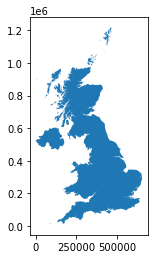

In [25]:
uk_gdf = countries_gdf.copy()
uk_gdf["union"] = "United Kingdom"
uk_gdf[[col for col in gdf.columns if col != "geometry"] + ["country", "union", "geometry"]]
uk_gdf = countries_gdf.dissolve(by="union")
uk_gdf.plot()